In [2]:
from dl.simple_cnn import SimpleCNN
from dl.callbacks.plot_loss import PlotLosses
from data.data_set import get_data
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TerminateOnNaN, EarlyStopping, ModelCheckpoint, TensorBoard
from config import DL_MODELS_PATH, TB_LOGS_PATH
import os
import pathlib
from swa.tfkeras import SWA
from dl.callbacks.cyclical_lr import CyclicLR

2019-12-15 14:56:44,562 : INFO : Checking/creating directories...
2019-12-15 14:56:44,563 : INFO : Directories are set.


In [3]:
((X_train, y_train), (X_val, y_val)) = get_data()

In [4]:
model = SimpleCNN(optimizer=RMSprop())

In [5]:
callbacks = [TerminateOnNaN(), EarlyStopping(monitor='val_categorical_accuracy', patience=3)]
callbacks.append(ModelCheckpoint(os.path.join(DL_MODELS_PATH, 'simple-cnn-{epoch:02d}-{val_accuracy:.2f}.hdf5'), monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max'))
tb_path = os.path.join(TB_LOGS_PATH, 'simple_cnn')
pathlib.Path(tb_path).mkdir(parents=True, exist_ok=True)
callbacks.append(TensorBoard(log_dir=tb_path))
callbacks.append(PlotLosses())
callbacks.append(SWA(start_epoch=5, lr_schedule='constant', swa_lr=0.001, verbose=1))
callbacks.append(CyclicLR(base_lr=0.001, max_lr=0.006, step_size=2000.))

<Figure size 432x288 with 0 Axes>

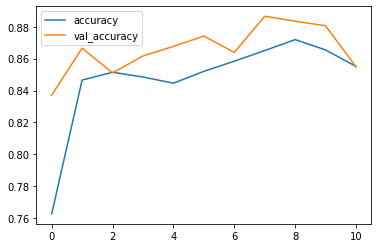

60000/60000 [==============================] - 15s 244us/sample - loss: 0.4261 - accuracy: 0.8551 - categorical_crossentropy: 0.4261 - categorical_accuracy: 0.8551 - val_loss: 0.3894 - val_accuracy: 0.8549 - val_categorical_crossentropy: 0.3894 - val_categorical_accuracy: 0.8549

Epoch 00051: final model weights set to stochastic weight average


In [6]:
history = model.train(X_train, y_train, X_val, y_val, 128, 50, callbacks)